# **Desafio de Regressão**

Nome: Camila Sayaka Hiura N°USP11218323

# **Descrição do problema e análise dos dados**

O trabalho tem como objetivo  prever o lucro das vendas de cerveja, apresentando uma análise detalhada do conjunto de dados e descrição das transformações de dados realizadas.

# **Imports**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# **Leitura dos dados**

**Produt_range**

In [104]:
data1 = pd.read_csv('/content/Product_range.csv', header=(0))
print("Número de linhas e colunas:",data1.shape)
data1.head(10)

Número de linhas e colunas: (5314, 8)


,Product_code,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
0,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5
1,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0
2,1340,NaN,1000 IBU Imperial IPA Barrel l,960.0,Liters,NaN,1.000,9.6
3,4372,NaN,18th Street Brewery,NaN,NaN,USA,NaN,NaN
4,4302,NaN,18th Street Brewery Deal With The Devil 0.473,630.0,Pieces,USA,0.473,8.5
5,4304,NaN,18th Street Brewery Pins And Needles 0.473,630.0,Pieces,USA,0.473,8.5
6,4300,NaN,18th Street Brewery Rise Of The Angels 0.473,520.0,Pieces,USA,0.473,7.5
7,4775,NaN,18th Street Brewery Rubicon 0.473,480.0,Pieces,USA,0.473,7.0
8,4301,NaN,18th Street Brewery Sex and Candy 0.473,480.0,Pieces,USA,0.473,7.5
9,4303,NaN,18th Street Brewery Under Crown 0.473,640.0,Pieces,USA,0.473,8.8


**Transactions**

In [4]:
data2 = pd.read_csv('/content/Transactions.csv', header=(0))
print("Número de linhas e colunas:",data2.shape)
data2.head(10)

Número de linhas e colunas: (50084, 8)


,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage
0,2020-01-01 23:00:00,144,1.0,280.00,NaN,155.00,124.00,NaN
1,2020-01-01 23:00:00,209,2.0,545.73,294.27,75.73,16.11,35.03
2,2020-01-01 23:00:00,213,2.0,1265.05,34.95,653.05,106.71,2.69
3,2020-01-01 23:00:00,217,1.0,630.00,70.00,220.50,53.85,10.00
4,2020-01-01 23:00:00,222,2.0,1104.75,195.25,393.75,55.38,15.02
5,2020-01-01 23:00:00,243,1.0,292.36,157.64,1.36,0.47,35.03
6,2020-01-01 23:00:00,258,1.0,559.55,240.45,93.55,20.08,30.06
7,2020-01-01 23:00:00,270,2.0,497.82,242.18,35.82,7.75,32.73
8,2020-01-01 23:00:00,271,1.0,324.84,175.16,53.84,19.87,35.03
9,2020-01-01 23:00:00,282,1.0,423.00,47.00,252.00,147.37,10.00


**Merge**

In [105]:
data = pd.merge(data1, data2, on='Product_code')

In [52]:
print("Número de linhas e colunas:",data.shape)
data.head(10)

Número de linhas e colunas: (50084, 15)


,Product_code,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV,Date_and_time_of_unloading,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage
0,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-03 00:00:00,2.0,420.00,180.00,140.00,50.00,30.00
1,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-09 13:00:00,4.0,960.00,240.00,400.00,71.43,20.00
2,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-19 20:00:00,5.0,1440.00,60.00,740.00,105.71,4.00
3,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-20 17:00:00,4.0,412.23,277.77,52.23,14.51,40.26
4,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-23 17:00:00,2.0,360.00,40.00,180.00,100.00,10.00
5,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-27 17:00:00,2.0,319.73,80.27,139.73,77.63,20.07
6,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-05-06 00:00:00,2.0,316.66,83.34,136.66,75.92,20.84
7,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-05-09 19:00:00,1.0,159.71,40.29,69.71,77.46,20.15
8,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-05-21 18:00:00,2.0,320.00,80.00,140.00,77.78,20.00
9,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-05-26 18:00:00,1.0,160.00,40.00,70.00,77.78,20.00


# **Análise Exploratória dos Dados**

In [8]:
# Informações sobre estrutura e conteúdo do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50084 entries, 0 to 50083
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product_code                50084 non-null  int64  
 1   Vendor_code                 43760 non-null  object 
 2   Name                        50084 non-null  object 
 3   Retail_price                50081 non-null  float64
 4   Base_unit                   50084 non-null  object 
 5   Country_of_Origin           41575 non-null  object 
 6   Size                        44248 non-null  float64
 7   ABV                         44234 non-null  float64
 8   Date_and_time_of_unloading  50084 non-null  object 
 9   Amount                      50084 non-null  float64
 10  Sale_amount                 50033 non-null  float64
 11  Discount_amount             39882 non-null  float64
 12  Profit                      50070 non-null  float64
 13  Percentage_markup           481

In [16]:
# Resumo estatística dos dados
data.describe()

,Product_code,Retail_price,Size,ABV,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage
count,50084.000000,50081.000000,44248.000000,44234.000000,50084.000000,50033.000000,39882.000000,50070.000000,48145.000000,39882.000000
mean,2153.160031,508.305634,0.629007,6.610985,3.553146,1429.786677,243.761323,705.901987,109.184511,17.251313
std,1367.357705,340.652038,0.876320,2.143129,5.485805,2419.585455,405.902060,1352.628611,1182.538753,16.608075
min,99.000000,1.000000,0.150000,0.500000,0.033000,0.410000,0.010000,-9300.630000,-100.000000,0.000000
25%,899.000000,300.000000,0.330000,5.100000,1.000000,330.000000,60.000000,143.070000,59.850000,7.930000
50%,2098.000000,380.000000,0.500000,6.000000,2.000000,630.000000,121.760000,283.000000,84.210000,12.000000
75%,3059.000000,600.000000,1.000000,7.800000,4.000000,1436.130000,270.615000,687.015000,107.790000,20.210000
max,5322.000000,8484.850000,30.000000,18.400000,248.000000,58184.070000,20440.630000,33352.460000,79900.000000,100.000000


In [10]:
# Mediana das variáveis numéricas
mediana = data1.median() 
print("Mediana ", mediana)

Mediana  Product_code    2690.5
Retail_price     520.0
Size               0.5
ABV                6.5
dtype: float64


<ipython-input-10-578dc0f7ab7c>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana = data1.median()


In [11]:
# Variância das variáveis numéricas
variancia = data1.var() 
print("Variância ", variancia)

Variância  Product_code    2.381521e+06
Retail_price    2.549190e+05
Size            9.087614e-01
ABV             6.041615e+00
dtype: float64


<ipython-input-11-5c1a91503c13>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variancia = data1.var()


In [ ]:
# Resumo das variáveis categóricas
data1[['Vendor_code', 'Name', 'Base_unit','Country_of_Origin']].describe()

,Vendor_code,Name,Base_unit,Country_of_Origin
count,4288,5314,4910,4205
unique,271,5193,4,28
top,AF Brew,NOT RELEVANT,Pieces,Russia
freq,245,24,3501,1659


In [20]:
# Transformando Date_and_time_of_unloading em Date e Time
data_tempo = data.copy(deep=True)
data_tempo['Date_and_time_of_unloading'] = pd.to_datetime(data_tempo['Date_and_time_of_unloading'])
data_tempo['Date'] = data_tempo['Date_and_time_of_unloading'].dt.strftime('%d/%m/%Y')
data_tempo['Time'] = data_tempo['Date_and_time_of_unloading'].dt.strftime('%H:%M:%S')

In [53]:
data_tempo['Date'] = pd.to_datetime(data_tempo['Date'])
data_tempo['Time'] = pd.to_datetime(data_tempo['Time'])

In [22]:
# Calculando o período total dos dados
print('Data mais antiga:', data_tempo["Date_and_time_of_unloading"].min())
print('Data mais recente:', data_tempo["Date_and_time_of_unloading"].max())
print(f'Período total dos dados: {data_tempo["Date_and_time_of_unloading"].max() - data_tempo["Date_and_time_of_unloading"].min()}')

Data mais antiga: 2020-01-01 23:00:00
Data mais recente: 2022-09-18 15:00:00
Período total dos dados: 990 days 16:00:00


In [79]:
# Contagem de valores únicos de Vendor_code
data['Vendor_code'].value_counts()

Jaws             4014
AF Brew          2756
BrewDog          2067
Naparbier        1839
Sobolev          1507
                 ... 
Nogne O             1
Volkovskaya         1
John Kepplers       1
High Water          1
De Struise          1
Name: Vendor_code, Length: 229, dtype: int64

In [80]:
# Contagem de valores únicos de Name
data['Name'].value_counts()

Karpachcho                                           385
Grissini portion                                     372
Jaws Atomnaja Prachechnaja / Ipa / 7,2% / 0,5 but    365
Jaws American Pale Ale / APA / 5.5% / 0,5 but        361
Jaws Oatmeal Stout / stout / 5.2% / 0,5 but          360
                                                    ... 
Jaws Stout MLK Metter Barrel                           1
Stamm Beer x FFF - Blue Collar Workers 0.33            1
Brewski Passionfeber IPA                               1
Wild Lab Bit Jam Barrel20                              1
John Kepplers / cider / 6% / 0.5 zh.b.                 1
Name: Name, Length: 3928, dtype: int64

In [78]:
# Contagem de valores únicos de Base_unit
data['Base_unit'].value_counts()

Pieces      36658
Liters      13383
100g           41
Kilogram        2
Name: Base_unit, dtype: int64

In [81]:
# Contagem de valores únicos de Country_of_Origin
data['Country_of_Origin'].value_counts()

Russia            19320
Belgium            4393
United Kingdom     2980
Germany            2585
USA                2338
Spain              2193
Sweden             2166
Denmark            1177
Netherlands        1143
France             1052
Estonia             555
Norway              513
Ireland             286
???                 210
Canada              179
Italy               171
Finland             149
Israel               56
Latvia               27
Japan                26
Croatia              19
Czech                14
Poland                9
Brazil                6
Scotland              5
China                 3
Name: Country_of_Origin, dtype: int64

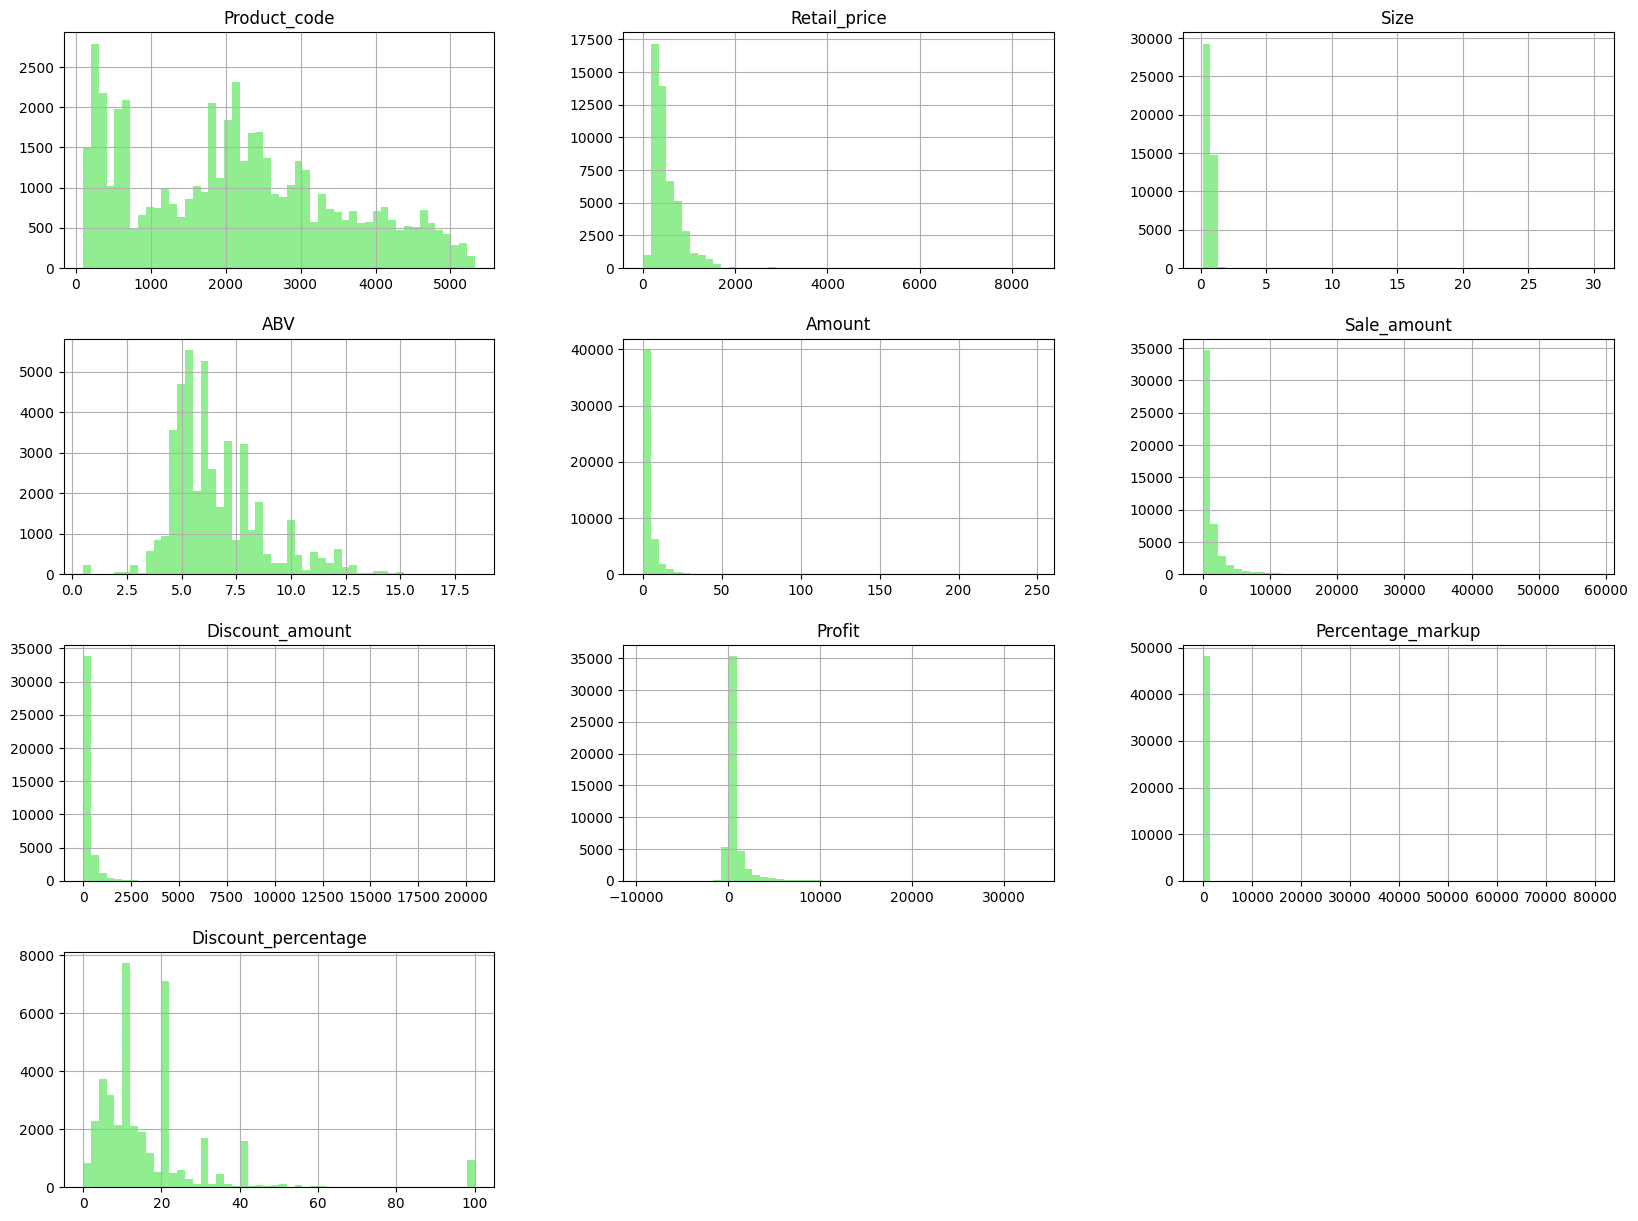

In [14]:
# Histogramas das variáveis numéricas
data.hist(bins=50, color = 'lightgreen', figsize=(20, 15))
plt.show()

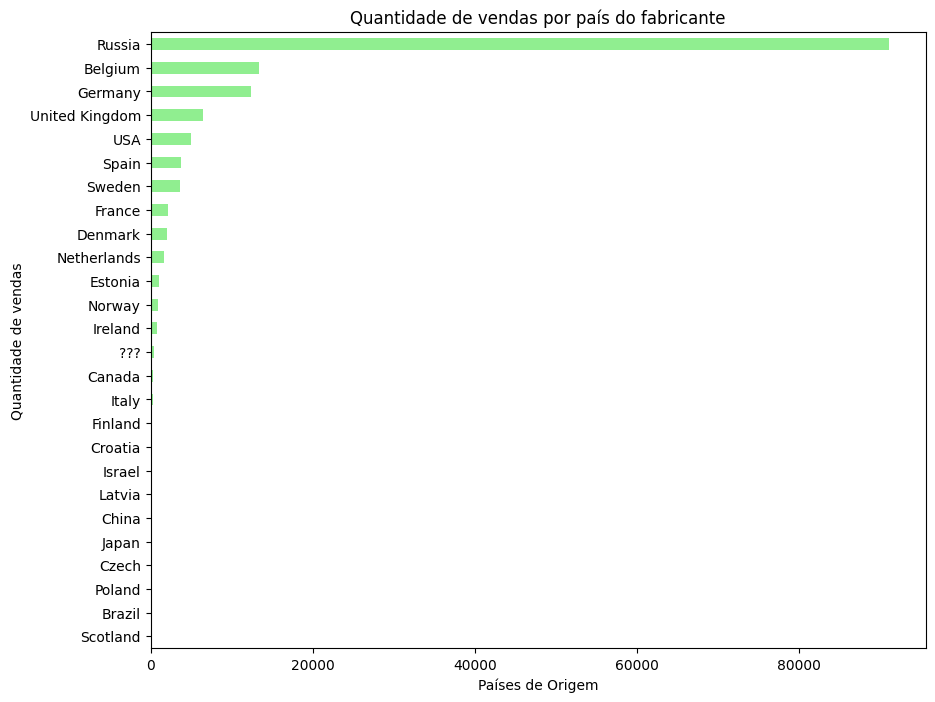

In [44]:
# Gráfico de barras
grouped_data = data.groupby("Country_of_Origin")["Amount"].sum()
grouped_data = grouped_data.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
grouped_data.plot(kind='barh', ax=ax, color ='lightgreen')

plt.xlabel("Países de Origem")
plt.ylabel("Quantidade de vendas")
plt.title('Quantidade de vendas por país do fabricante')
plt.show()

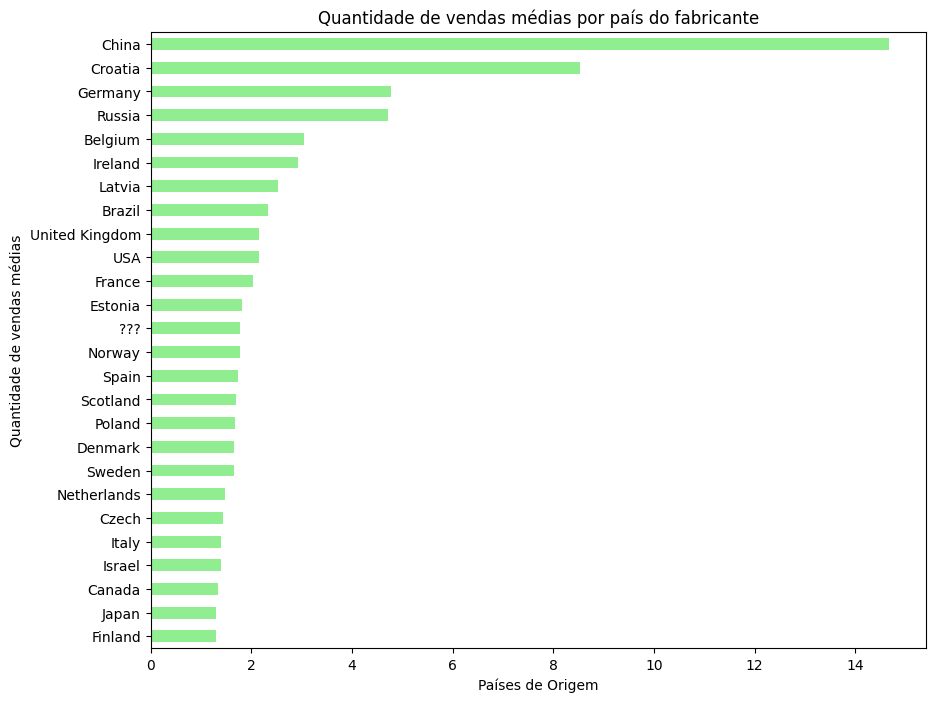

In [45]:
# Gráfico de barras
grouped_data = data.groupby("Country_of_Origin")["Amount"].mean()
grouped_data = grouped_data.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
grouped_data.plot(kind='barh', ax=ax, color='lightgreen')

plt.xlabel("Países de Origem")
plt.ylabel("Quantidade de vendas médias")
plt.title('Quantidade de vendas médias por país do fabricante')
plt.show()

In [24]:
# Extraindo mes e ano 
data_tempo['Dia_da_semana'] = [i.date().weekday() for i in data_tempo['Date']]
data_tempo['Mes'] = [i.date().month for i in data_tempo['Date']]
data_tempo['Ano'] = [i.date().year for i in data_tempo['Date']]

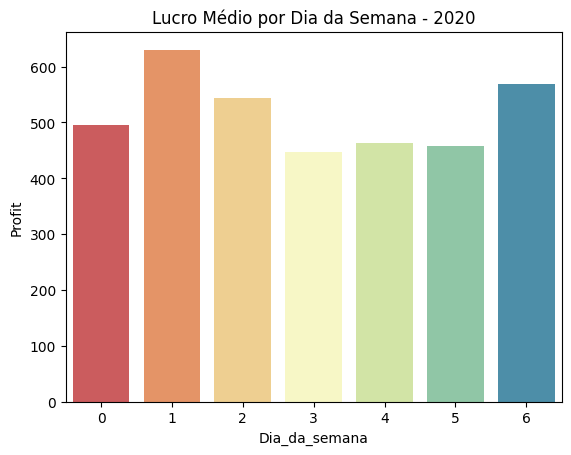

In [57]:
# Lucro médio por dia da semana em 2020
data_ano = data_tempo[data_tempo['Ano'] == 2020]

# Calcular o lucro médio por dia da semana
lucro_medio_por_dia = data_ano.groupby('Dia_da_semana')['Profit'].mean().reset_index()

# Plotar o gráfico de barras
sns.barplot(data=lucro_medio_por_dia, x='Dia_da_semana', y='Profit', palette='Spectral')
plt.title('Lucro Médio por Dia da Semana - 2020')
plt.show()

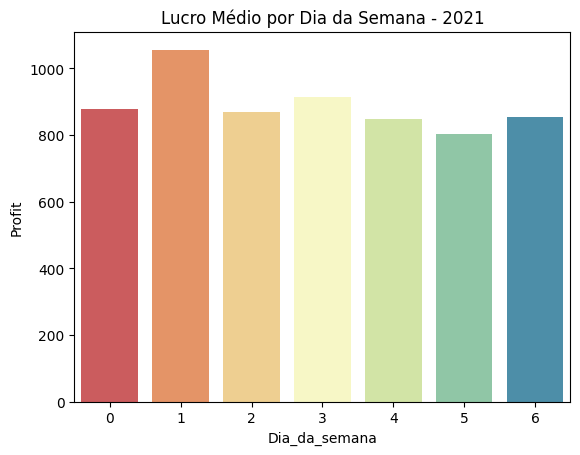

In [60]:
# Lucro médio por dia da semana em 2021
data_ano = data_tempo[data_tempo['Ano'] == 2021]

# Calcular o lucro médio por dia da semana
lucro_medio_por_dia = data_ano.groupby('Dia_da_semana')['Profit'].mean().reset_index()

# Plotar o gráfico de barras
sns.barplot(data=lucro_medio_por_dia, x='Dia_da_semana', y='Profit', palette='Spectral')
plt.title('Lucro Médio por Dia da Semana - 2021')
plt.show()

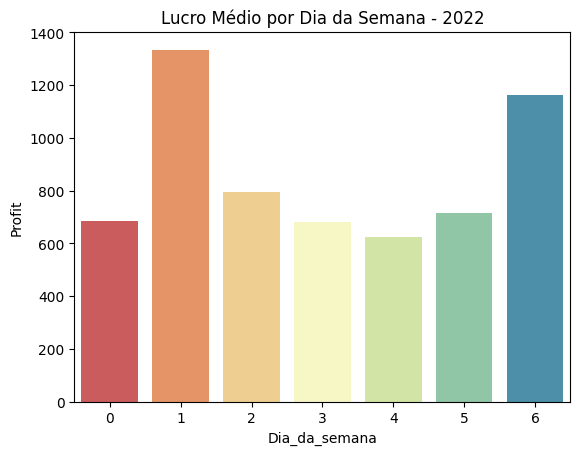

In [61]:
# Lucro médio por dia da semana em 2022
data_ano = data_tempo[data_tempo['Ano'] == 2022]

# Calcular o lucro médio por dia da semana
lucro_medio_por_dia = data_ano.groupby('Dia_da_semana')['Profit'].mean().reset_index()

# Plotar o gráfico de barras
sns.barplot(data=lucro_medio_por_dia, x='Dia_da_semana', y='Profit', palette='Spectral')
plt.title('Lucro Médio por Dia da Semana - 2022')
plt.show()

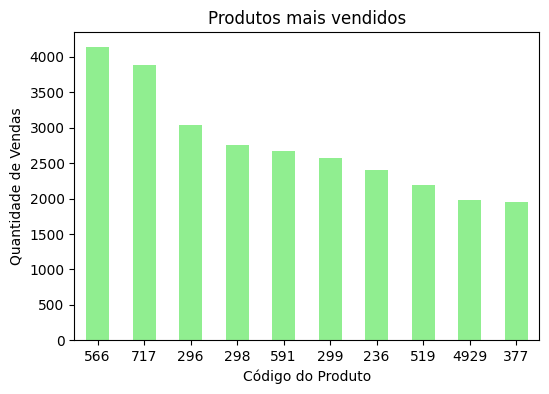

In [51]:
# Gráfico dos produtos mais vendidos
produtos_mais_vendidos = data.groupby('Product_code')['Amount'].sum()

# Ordena em ordem decrescente com base nas unidades vendidas
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False)

# Seleciona os produtos com o maior número de unidades vendidas 
top_produtos = produtos_mais_vendidos.head(10)

fig, ax = plt.subplots(figsize=(6, 4))
top_produtos.plot(kind='bar', ax=ax, color='lightgreen')

plt.xlabel("Código do Produto")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=0)
plt.title('Produtos mais vendidos')
plt.show()

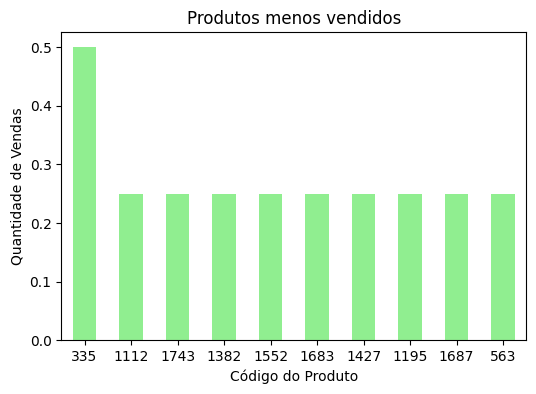

In [63]:
# Gráfico dos produtos menos vendidos
produtos_mais_vendidos = data.groupby('Product_code')['Amount'].sum()

# Ordena em ordem decrescente com base nas unidades vendidas
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False)

# Seleciona os produtos com o maior número de unidades vendidas 
top_produtos = produtos_mais_vendidos.tail(10)

fig, ax = plt.subplots(figsize=(6, 4))
top_produtos.plot(kind='bar', ax=ax, color='lightgreen')

plt.xlabel("Código do Produto")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=0)
plt.title('Produtos menos vendidos')
plt.show()

# **Pré Processamento dos Dados**


In [106]:
# Verificando se há linhas duplicadas
data.duplicated().sum()

0

In [107]:
# Verificando valores ausentes
data.isna().sum()

Product_code                      0
Vendor_code                    6324
Name                              0
Retail_price                      3
Base_unit                         0
Country_of_Origin              8509
Size                           5836
ABV                            5850
Date_and_time_of_unloading        0
Amount                            0
Sale_amount                      51
Discount_amount               10202
Profit                           14
Percentage_markup              1939
Discount_percentage           10202
dtype: int64

In [108]:
# Preenchendo a coluna com Unknown
data['Country_of_Origin'].fillna('Unknown', inplace=True)

In [109]:
# Preenchendo a coluna com média
mean_size = data['Size'].median()
data['Size'].fillna(mean_size, inplace=True)

In [110]:
# Preenchendo a coluna com mediana
median_abv = data['ABV'].median()
data['ABV'].fillna(median_abv, inplace=True)

In [111]:
# Preenchendo a coluna com média
mean_discount = data['Discount_amount'].median()
data['Discount_amount'].fillna(mean_discount, inplace=True)

In [112]:
# Preenchendo a coluna com média
mean_markup = data['Percentage_markup'].median()
data['Percentage_markup'].fillna(mean_markup, inplace=True)

In [113]:
# Preenchendo a coluna com média
mean_discount = data['Discount_percentage'].median()
data['Discount_percentage'].fillna(mean_discount, inplace=True)

In [114]:
# Removendo as linhas com na
data.dropna(inplace=True)

<ipython-input-117-3a1446b95663>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().round(2), annot = True)


<Axes: >

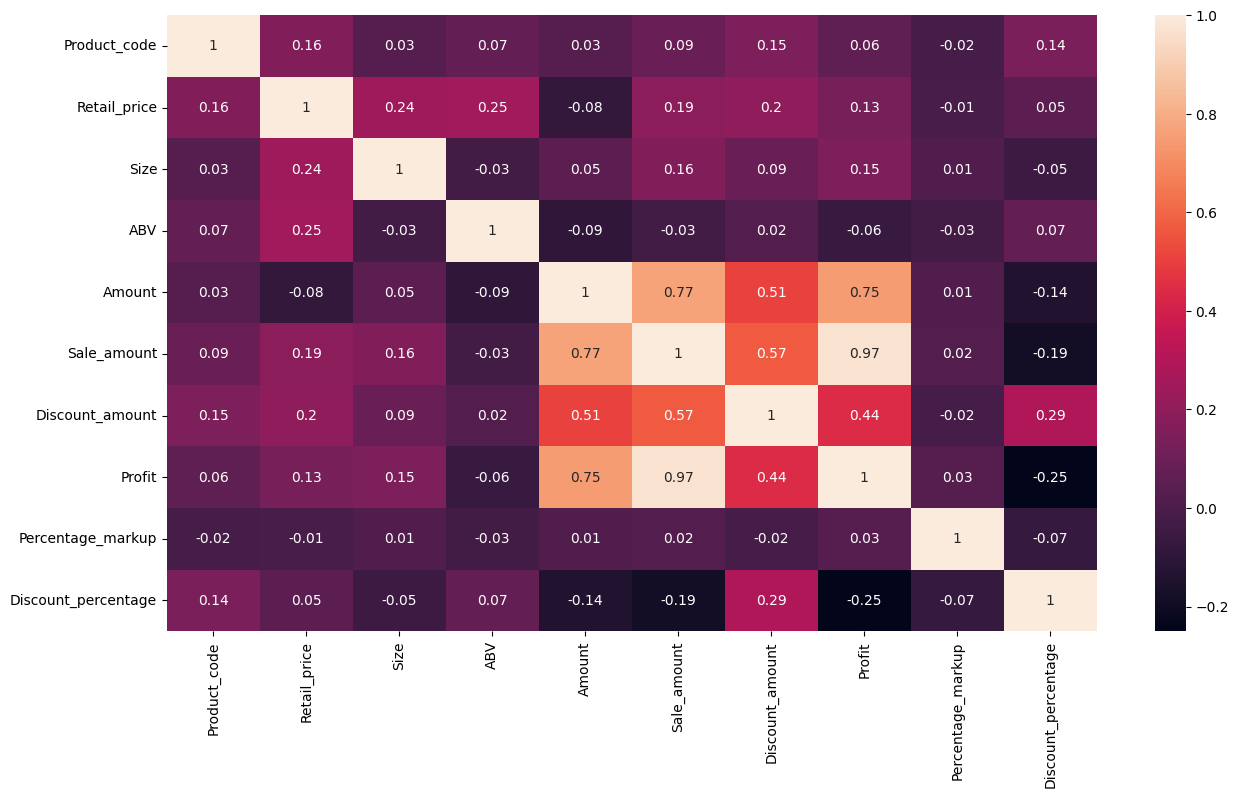

In [117]:
# Matriz de correlação
plt.figure(figsize = (15,8))
sns.heatmap(data.corr().round(2), annot = True)

In [118]:
# Removendo colunas
data = data.drop('Name', axis='columns')
data = data.drop('Sale_amount', axis='columns')
data = data.drop('Product_code', axis='columns')
data = data.drop('Vendor_code', axis='columns')
data = data.drop('Date_and_time_of_unloading', axis='columns')

In [119]:
# Transformando as variáveis categóricas por numéricas pelo OneHotEncondig
data = pd.get_dummies(data, columns = ['Country_of_Origin', 'Base_unit'])

In [120]:
# Separando as variáveis
X = data.drop('Profit', axis = 1)
X = X.values
y = data['Profit']

In [121]:
# Normalização
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [122]:
# Separando em conjunto de treino e de teste
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# **Modelagem**


In [123]:
# Funcao que calcula Raiz do Erro Quadrático Médio
def rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

### **Base Line**

**Regressão Linear Múltipla**

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regr = LinearRegression()
y_pred = regr.fit(X_train, y_train).predict(X_test)

print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

Erro Médio Absoluto: 325.47
Raiz do Erro Quadrático Médio: 726.46
R Score: 0.70


CROSS VALIDATION

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Gerando um conjunto de dados de exemplo
X, y = make_regression(n_samples=10000, n_features=5, random_state=42)

# Criando um objeto do modelo de regressão linear
model = LinearRegression()

# Calculando as pontuações de cross validation para as métricas
mae_score = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
rmse_score = -cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error').mean()
r2_score = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

# Imprimindo os resultados
print("MAE score:", mae_score)
print("RMSE score:", rmse_score)
print("R2 score:", r2_score)


MAE score: 7.42352449477346e-14
RMSE score: 9.382216865529889e-14
R2 score: 1.0


**SVM**

In [149]:
from sklearn.svm import LinearSVR
y_pred = LinearSVR(epsilon = 0.5).fit(X_train,y_train).predict(X_test)
print("Com epsilon = 0.5")
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

y_pred = LinearSVR(epsilon = 1.0).fit(X_train,y_train).predict(X_test)
print("Com epsilon = 1.0")
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

y_pred = LinearSVR(epsilon = 1.5).fit(X_train,y_train).predict(X_test)
print("Com epsilon = 1.5")
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

y_pred = LinearSVR(epsilon = 15).fit(X_train,y_train).predict(X_test)
print("Com epsilon = 15")
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

Com epsilon = 0.5
Erro Médio Absoluto: 489.16
Raiz do Erro Quadrático Médio: 1264.75
R Score: 0.08
Com epsilon = 1.0
Erro Médio Absoluto: 489.16
Raiz do Erro Quadrático Médio: 1264.71
R Score: 0.08
Com epsilon = 1.5
Erro Médio Absoluto: 489.21
Raiz do Erro Quadrático Médio: 1265.06
R Score: 0.08
Com epsilon = 15
Erro Médio Absoluto: 489.22
Raiz do Erro Quadrático Médio: 1264.63
R Score: 0.08


**Árvore de Regressão**

In [152]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree

y_pred = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train).predict(X_test)
print("Max_depth=2:")
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Erro Quadrático Médio: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

y_pred = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train).predict(X_test)
print("Max_depth=5:")
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

y_pred = DecisionTreeRegressor(max_depth=10).fit(X_train,y_train).predict(X_test)
print("Max_depth=10:")
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

y_pred = DecisionTreeRegressor().fit(X_train,y_train).predict(X_test)
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))


Max_depth=2:
Erro Médio Absoluto: 365.84
Erro Quadrático Médio: 636572.31
R Score: 0.63
Max_depth=5:
Erro Médio Absoluto: 191.45
Raiz do Erro Quadrático Médio: 445.01
R Score: 0.89
Max_depth=10:
Erro Médio Absoluto: 98.60
Raiz do Erro Quadrático Médio: 276.12
R Score: 0.96
Erro Médio Absoluto: 63.72
Raiz do Erro Quadrático Médio: 264.56
R Score: 0.96


CROSS VALIDATION

In [166]:
# Gerando um conjunto de dados de exemplo
X, y = make_regression(n_samples=10000, n_features=5, random_state=42)

# Criando um objeto do modelo de árvore de regressão
model = DecisionTreeRegressor()

# Calculando as pontuações de cross validation para as métricas
mae_score = -cross_val_score(model, X, y, cv=15, scoring='neg_mean_absolute_error').mean()
rmse_score = -cross_val_score(model, X, y, cv=15, scoring='neg_root_mean_squared_error').mean()
r2_score = cross_val_score(model, X, y, cv=15, scoring='r2').mean()

# Imprimindo os resultados
print("MAE score:", mae_score)
print("RMSE score:", rmse_score)
print("R2 score:", r2_score)

MAE score: 14.604059459382455
RMSE score: 19.93074691492921
R2 score: 0.978446603065899


**Regressão Ridge**

In [157]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

Erro Médio Absoluto: 326.04
Raiz do Erro Quadrático Médio: 736.93
R Score: 0.69


CROSS VALIDATION

In [176]:
X, y = make_regression(n_samples=10000, n_features=50, random_state=42)


model = Ridge()

# Calculando as pontuações de cross validation para as métricas
mae_score = -cross_val_score(model, X, y, cv=20, scoring='neg_mean_absolute_error').mean()
rmse_score = -cross_val_score(model, X, y, cv=20, scoring='neg_root_mean_squared_error').mean()
r2_score = cross_val_score(model, X, y, cv=20, scoring='r2').mean()

# Imprimindo os resultados
print("MAE score:", mae_score)
print("RMSE score:", rmse_score)
print("R2 score:", r2_score)

MAE score: 0.014570915025173787
RMSE score: 0.018221321155180808
R2 score: 0.9999999888014326


**Regressão Lasso**

In [129]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)  # O parâmetro alpha controla a força da penalização

# Treinar o modelo usando o conjunto de treinamento
lasso.fit(X_train, y_train)

# Fazer previsões usando o conjunto de teste
y_pred = lasso.predict(X_test)

print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

Erro Médio Absoluto: 324.57
Raiz do Erro Quadrático Médio: 734.44
R Score: 0.69


CROSS VALIDATION

In [171]:
X, y = make_regression(n_samples=10000, n_features=30, random_state=42)


model = Lasso()

# Calculando as pontuações de cross validation para as métricas
mae_score = -cross_val_score(model, X, y, cv=20, scoring='neg_mean_absolute_error').mean()
rmse_score = -cross_val_score(model, X, y, cv=20, scoring='neg_root_mean_squared_error').mean()
r2_score = cross_val_score(model, X, y, cv=20, scoring='r2').mean()

# Imprimindo os resultados
print("MAE score:", mae_score)
print("RMSE score:", rmse_score)
print("R2 score:", r2_score)

MAE score: 2.5234277027016416
RMSE score: 3.147249169294464
R2 score: 0.9997195265517378


## **Esemble**

**Lightgbm**

In [133]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
import lightgbm as lgb

In [182]:
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Criar o conjunto de dados de treinamento do LightGBM
train_data = lgb.Dataset(X_train,y_train)

# Treinar o modelo
model = lgb.train(params, train_data, num_boost_round=100)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1302
[LightGBM] [Info] Number of data points in the train set: 30594, number of used features: 29
[LightGBM] [Info] Start training from score 682.063055
Erro Médio Absoluto: 61.70
Raiz do Erro Quadrático Médio: 268.67
R Score: 0.96


**XGBOOST**

In [183]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [184]:
from xgboost import XGBRegressor

model = XGBRegressor()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print("Erro Médio Absoluto: %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio: %.2f" % rmse(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))

Erro Médio Absoluto: 48.06
Raiz do Erro Quadrático Médio: 200.76
R Score: 0.98
